# Subgradient

## Subgradient calculus


1. Find $\partial f(x)$, if $$f(x) = \text{ReLU}(x) = \max \{0, x\}$$

<font color="lime"> ==YOUR ANSWER== </font>

2. Find $\partial f(x)$, if:

$$
f(x)=\left|x-5\right|+2\left|10-x\right|\ +\ 5\left|x-9\right|
$$

<font color="lime"> ==YOUR ANSWER== </font>

## Support Vector Machines

3. In a linear classification problem, we're given $m$ labeled points $(a_i, y_i)$ and we wish to find a hyperplane given by a vector $x$ that separates them so that 

* $\langle a_i, x\rangle \ge 1$ when $y_i=1$, and 
* $\langle a_i, x\rangle \le -1$ when $y_i = -1$

The smaller the norm $\|x\|$ the larger the *margin* between positive and negative instances. Therefore, it makes sense to throw in a regularizer that penalizes large norms. This leads to the objective.

<p>
$$\frac 1m \sum_{i=1}^m \max\{1-y_i(a_i^\top x), 0\} + \frac{\alpha}2\|x\|^2$$
</p>

In [ ]:
def hinge_loss(z):
    return np.maximum(1.-z, np.zeros(z.shape))

def svm_objective(A, y, x, alpha=0.1):
    """SVM objective."""
    m, _ = A.shape
    return np.mean(hinge_loss(np.diag(y).dot(A.dot(x))))+(alpha/2)*x.dot(x)

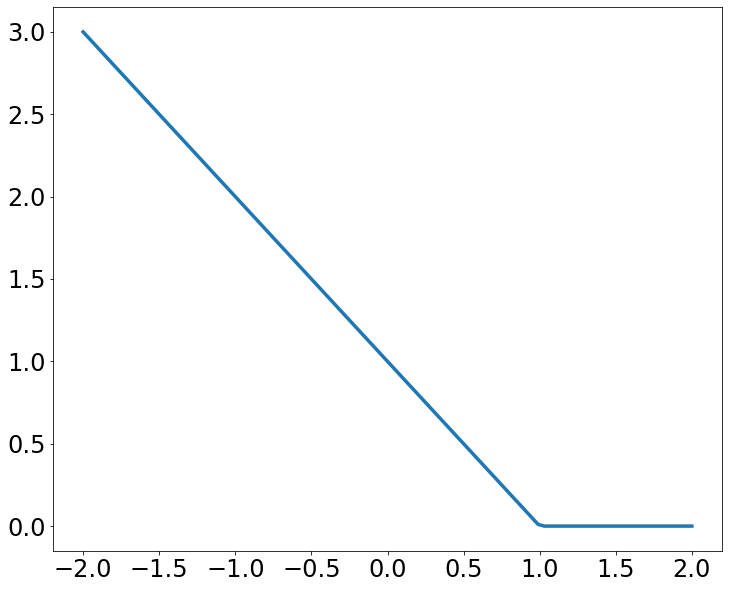

In [ ]:
z = np.linspace(-2, 2, 100)
plt.figure(figsize=(12,10))
plt.plot(z, hinge_loss(z), **kwargs)

In [ ]:
def hinge_subgradient(z):
    g = np.zeros(z.shape)
    g[z < 1] = -1.
    return g

def svm_subgradient(A, y, x, alpha=0.1):
    ###
    ### YOU CODE IS HERE
    ###
    return 0

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(z, hinge_subgradient(z), **kwargs)

In [ ]:
m, n = 1000, 100
A = np.vstack([np.random.normal(0.1, 1, (m//2, n)),
               np.random.normal(-0.1, 1, (m//2, n))])
y = np.hstack([np.ones(m//2), -1.*np.ones(m//2)])
x0 = np.random.normal(0, 1, n)
xs = gradient_descent(x0, [0.01]*100, 
                      lambda x: svm_subgradient(A, y, x, 0.05))

In [ ]:
error_plot([svm_objective(A, y, x) for x in xs])

Let's see if averaging out the solutions gives us an improved function value.

In [ ]:
xavg = 0.0
for x in xs:
    xavg += x
svm_objective(A, y, xs[-1]), svm_objective(A, y, xavg/len(xs))

(1.1027879681041983, 0.9452897105048998)

We can also look at the accuracy of our linear model for predicting the labels. From how we defined the data, we can see that the all ones vector is the highest accuracy classifier in the limit of infinite data (very large $m$). For a finite data set, the accuracy could be even higher due to random fluctuations.

In [ ]:
def accuracy(A, y, x):
    return np.mean(np.diag(y).dot(A.dot(x))>0)

In [ ]:
plt.figure(figsize=(12,10))
plt.ylabel('Accuracy')
plt.xlabel('Step')
plt.plot(range(len(xs)), [accuracy(A, y, x) for x in xs], **kwargs)
plt.plot(range(len(xs)), [accuracy(A, y, np.ones(n))]*len(xs),
        label='Population optimum', **kwargs)
_ = plt.legend()

We see that the accuracy spikes pretty early and drops a bit as we train for too long.